# Flight_price project

Loading needed libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')

CHECKING DATA ROWS AND COLUMNS

In [3]:
df=pd.read_excel('flight_train.xlsx')

In [5]:
df

Airline    Source Destination                  Route Dep_Time  \
0           IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   
...            ...       ...         ...                    ...      ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    19:55   
10679    Air India   Kolkata    Banglore              CCU → BLR    20:45   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    08:20   
10681      Vistara  Banglore   New Delhi              BLR → DEL    11:30   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK    10:55   

       Arrival_Time Duration Total_Stops Additional_Info  Price  
0      01:10 22 Mar   2h 50m    non-stop         No info   3897  
1             13:15   7h 25m     2 stops         No info   7662  
2      04:25 10 Jun      19h     2 stops         No info  13882  
3             23:30   5h 25m      1 stop         No info   6218  
4             21:35   4h 45m      1 stop         No info  13302  
...             ...      ...         ...             ...    ...  
10678         22:25   2h 30m    non-stop         No info   4107  
10679         23:20   2h 35m    non-stop         No info   4145  
10680         11:20       3h    non-stop         No info   7229  
10681         14:10   2h 40m    non-stop         No info  12648  
10682         19:15   8h 20m     2 stops         No info  11753  

[10683 rows x 10 columns]

In [6]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

In [7]:
df.shape

(10683, 10)

In [8]:
df.head()

Airline    Source Destination                  Route Dep_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   

   Arrival_Time Duration Total_Stops Additional_Info  Price  
0  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1         13:15   7h 25m     2 stops         No info   7662  
2  04:25 10 Jun      19h     2 stops         No info  13882  
3         23:30   5h 25m      1 stop         No info   6218  
4         21:35   4h 45m      1 stop         No info  13302

In [9]:
df.tail()

Airline    Source Destination                  Route Dep_Time  \
10678     Air Asia   Kolkata    Banglore              CCU → BLR    19:55   
10679    Air India   Kolkata    Banglore              CCU → BLR    20:45   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    08:20   
10681      Vistara  Banglore   New Delhi              BLR → DEL    11:30   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK    10:55   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
10678        22:25   2h 30m    non-stop         No info   4107  
10679        23:20   2h 35m    non-stop         No info   4145  
10680        11:20       3h    non-stop         No info   7229  
10681        14:10   2h 40m    non-stop         No info  12648  
10682        19:15   8h 20m     2 stops         No info  11753

In [10]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

ALL THE FEATURE COLUMNS ARE IN OBJECT DTYPES, LATER WE HAVE TO ENCODE THE DATASET

In [11]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

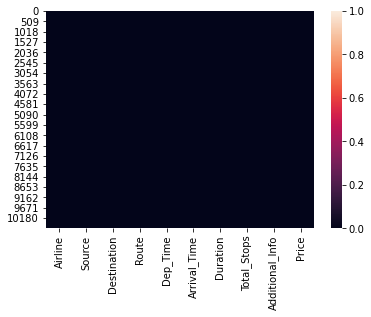

In [12]:
sns.heatmap(df.isnull())

IN TWO COLUMNS THERE IS A NULL VALUE PRESENCE WE HAVE TO TREAT IT AFTERWARDS

# EDA

# ANALYSING TARGET VARIABLE

Price column is our target here ,we want to analyse the target first

In [13]:
df['Price']

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

TARGETCOLUMN CONSIST OF CONTINEOUS VALUES SO FOR ANALYSIS WE HAVE TO IMPLEMENT REGRESSION METHODS

# FEATURE COLUMNS:UNIVARIATE ANALYSIS

# COUNT PLOTS

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


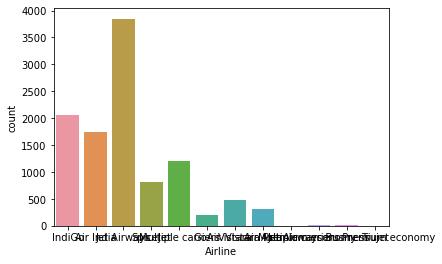

In [14]:
sns.countplot(df['Airline'])
print(df["Airline"].value_counts())

Airline COLUMN JET AIRWAYS HAVE MORE COUNT AND TRUJET HAS A SINGLE COUNT

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64


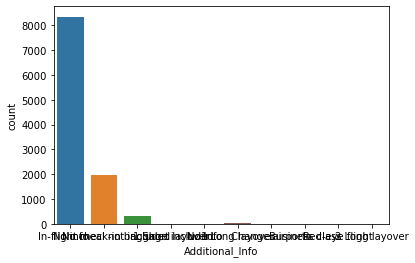

In [16]:
sns.countplot(df['Additional_Info'])
print(df["Additional_Info"].value_counts())

FIGURE SHOWS THE ADDITIONAL INFORMATION ABOUT THE TRAVEL

# bivariate analysis

<AxesSubplot:title={'center':'comparison of Airline AND Price'}, xlabel='Airline', ylabel='Price'>

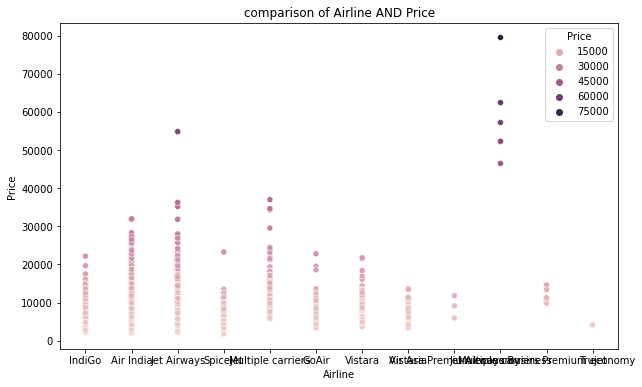

In [17]:
plt.figure(figsize=[10,6])
plt.title('comparison of Airline AND Price')
sns.scatterplot(df['Airline'],df['Price'],hue=df['Price'])

airlines are surely depending price of travel jet airways business always have high price value

<AxesSubplot:title={'center':'comparison ofDestination  ANDPrice '}, xlabel='Destination', ylabel='Price'>

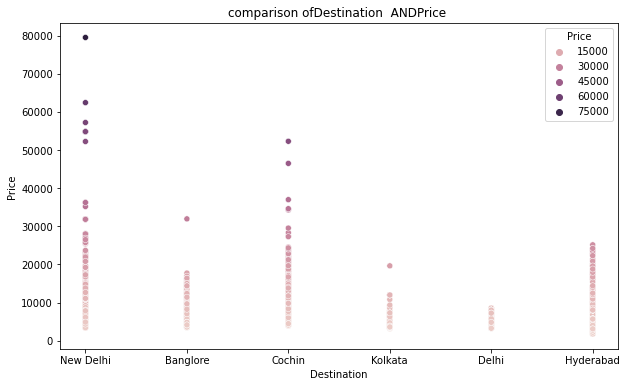

In [18]:
plt.figure(figsize=[10,6])
plt.title('comparison ofDestination  ANDPrice ')
sns.scatterplot(df['Destination'],df['Price'],hue=df['Price'])

destination also depending price values newdelhi and cochin have high rates

<AxesSubplot:title={'center':'comparison of Dep_Time AND Price'}, xlabel='Dep_Time', ylabel='Price'>

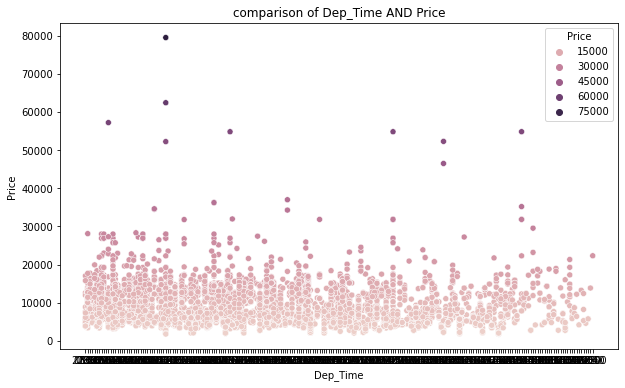

In [19]:
plt.figure(figsize=[10,6])
plt.title('comparison of Dep_Time AND Price')
sns.scatterplot(df['Dep_Time'],df['Price'],hue=df['Price'])

detarture time is not at all depending price

<AxesSubplot:title={'center':'comparison of Duration AND Price'}, xlabel='Duration', ylabel='Price'>

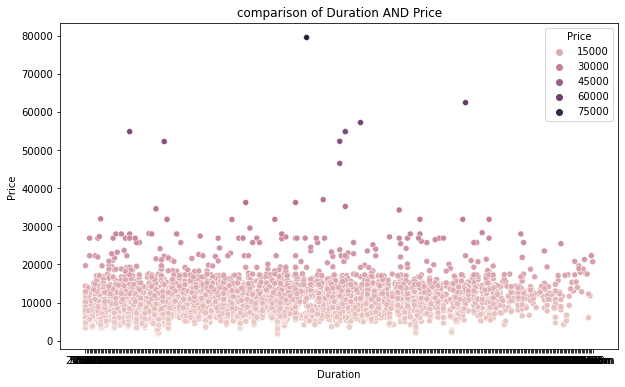

In [20]:
plt.figure(figsize=[10,6])
plt.title('comparison of Duration AND Price')
sns.scatterplot(df['Duration'],df['Price'],hue=df['Price'])

duration also not depending the price of the flight

<AxesSubplot:title={'center':'comparison of Total_Stops AND Price'}, xlabel='Total_Stops', ylabel='Price'>

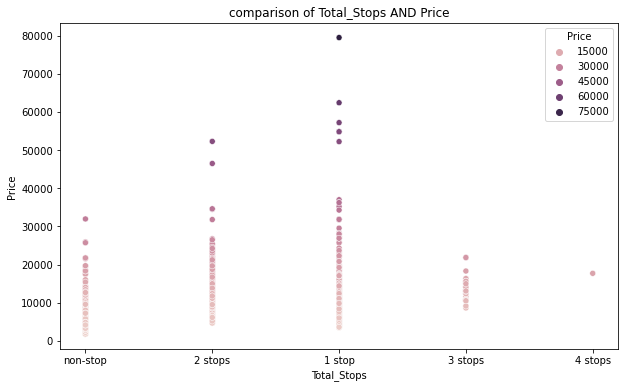

In [21]:
plt.figure(figsize=[10,6])
plt.title('comparison of Total_Stops AND Price')
sns.scatterplot(df['Total_Stops'],df['Price'],hue=df['Price'])

single stop is always have high fare, fasre is surely depending stops

#  CHECKING OUTLIERS

OUTLIER PRESENCE IS NOT THERE

# DATA PREPROCESSING

In [22]:
df.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

ALL COLUMNS ARE CATEGORICAL AND IN OBJECT DTYPES,,SO WE WANT TO ENCODE IT

# treating null variable

In [23]:
df.isnull().sum()

Airline            0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

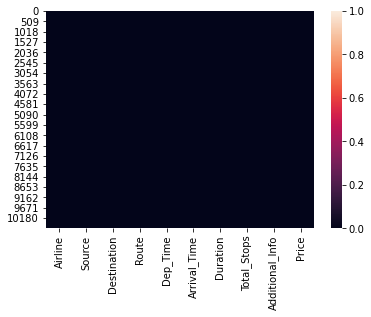

In [24]:
sns.heatmap(df.isnull())

Route AND Total_Stops  CONTAINS NULL VALUES, WE WANT TO TREAT IT WITH MODE

In [25]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [26]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

<AxesSubplot:>

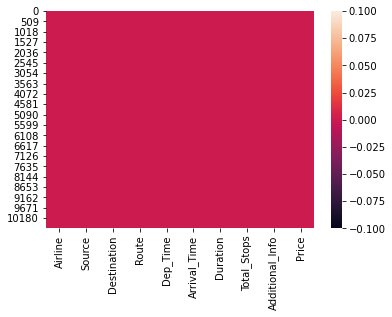

In [27]:
sns.heatmap(df.isnull())

NULL VALUES CLEARTED

# ENCODING

In [28]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [29]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [30]:
df

Airline  Source  Destination  Route  Dep_Time  Arrival_Time  Duration  \
0          3.0     0.0          5.0   18.0     211.0         233.0     240.0   
1          1.0     3.0          0.0   84.0      31.0         906.0     336.0   
2          4.0     2.0          1.0  118.0      70.0         413.0     106.0   
3          3.0     3.0          0.0   91.0     164.0        1324.0     311.0   
4          3.0     0.0          5.0   29.0     149.0        1237.0     303.0   
...        ...     ...          ...    ...       ...           ...       ...   
10678      0.0     3.0          0.0   64.0     183.0        1259.0     236.0   
10679      1.0     3.0          0.0   64.0     193.0        1305.0     237.0   
10680      4.0     0.0          2.0   18.0      58.0         824.0     280.0   
10681     10.0     0.0          5.0   18.0      92.0         938.0     238.0   
10682      1.0     2.0          1.0  108.0      85.0        1124.0     347.0   

       Total_Stops  Additional_Info  Price  
0              4.0              8.0   3897  
1              1.0              8.0   7662  
2              1.0              8.0  13882  
3              0.0              8.0   6218  
4              0.0              8.0  13302  
...            ...              ...    ...  
10678          4.0              8.0   4107  
10679          4.0              8.0   4145  
10680          4.0              8.0   7229  
10681          4.0              8.0  12648  
10682          1.0              8.0  11753  

[10683 rows x 10 columns]

In [31]:
df.dtypes

Airline            float64
Source             float64
Destination        float64
Route              float64
Dep_Time           float64
Arrival_Time       float64
Duration           float64
Total_Stops        float64
Additional_Info    float64
Price                int64
dtype: object

datas encoded sussessfully

# CORRELATION AND HEATMAP

In [32]:
cor=df.corr()

In [33]:
cor

Airline    Source  Destination     Route  Dep_Time  \
Airline          1.000000 -0.013401     0.018479  0.025118 -0.039439   
Source          -0.013401  1.000000    -0.592574  0.403403  0.055191   
Destination      0.018479 -0.592574     1.000000 -0.461183 -0.063608   
Route            0.025118  0.403403    -0.461183  1.000000 -0.082051   
Dep_Time        -0.039439  0.055191    -0.063608 -0.082051  1.000000   
Arrival_Time    -0.015733  0.020844    -0.036830  0.010560 -0.023294   
Duration         0.027917 -0.192009     0.022037 -0.062097  0.041619   
Total_Stops      0.036064 -0.225601     0.337883 -0.437783  0.044687   
Additional_Info -0.060802 -0.022107     0.026806  0.035188 -0.052853   
Price           -0.039520  0.015998    -0.071112  0.164118  0.002949   

                 Arrival_Time  Duration  Total_Stops  Additional_Info  \
Airline             -0.015733  0.027917     0.036064        -0.060802   
Source               0.020844 -0.192009    -0.225601        -0.022107   
Destination         -0.036830  0.022037     0.337883         0.026806   
Route                0.010560 -0.062097    -0.437783         0.035188   
Dep_Time            -0.023294  0.041619     0.044687        -0.052853   
Arrival_Time         1.000000  0.027746    -0.097132         0.017505   
Duration             0.027746  1.000000     0.175207         0.080151   
Total_Stops         -0.097132  0.175207     1.000000         0.164009   
Additional_Info      0.017505  0.080151     0.164009         1.000000   
Price                0.027377 -0.144270    -0.571174        -0.065478   

                    Price  
Airline         -0.039520  
Source           0.015998  
Destination     -0.071112  
Route            0.164118  
Dep_Time         0.002949  
Arrival_Time     0.027377  
Duration        -0.144270  
Total_Stops     -0.571174  
Additional_Info -0.065478  
Price            1.000000

ABOVE TABLE GIVES THE DETAILS OF CORRELATION AMONG COLUMNS, PLOT WILL CONVEY THIS MORE

<AxesSubplot:>

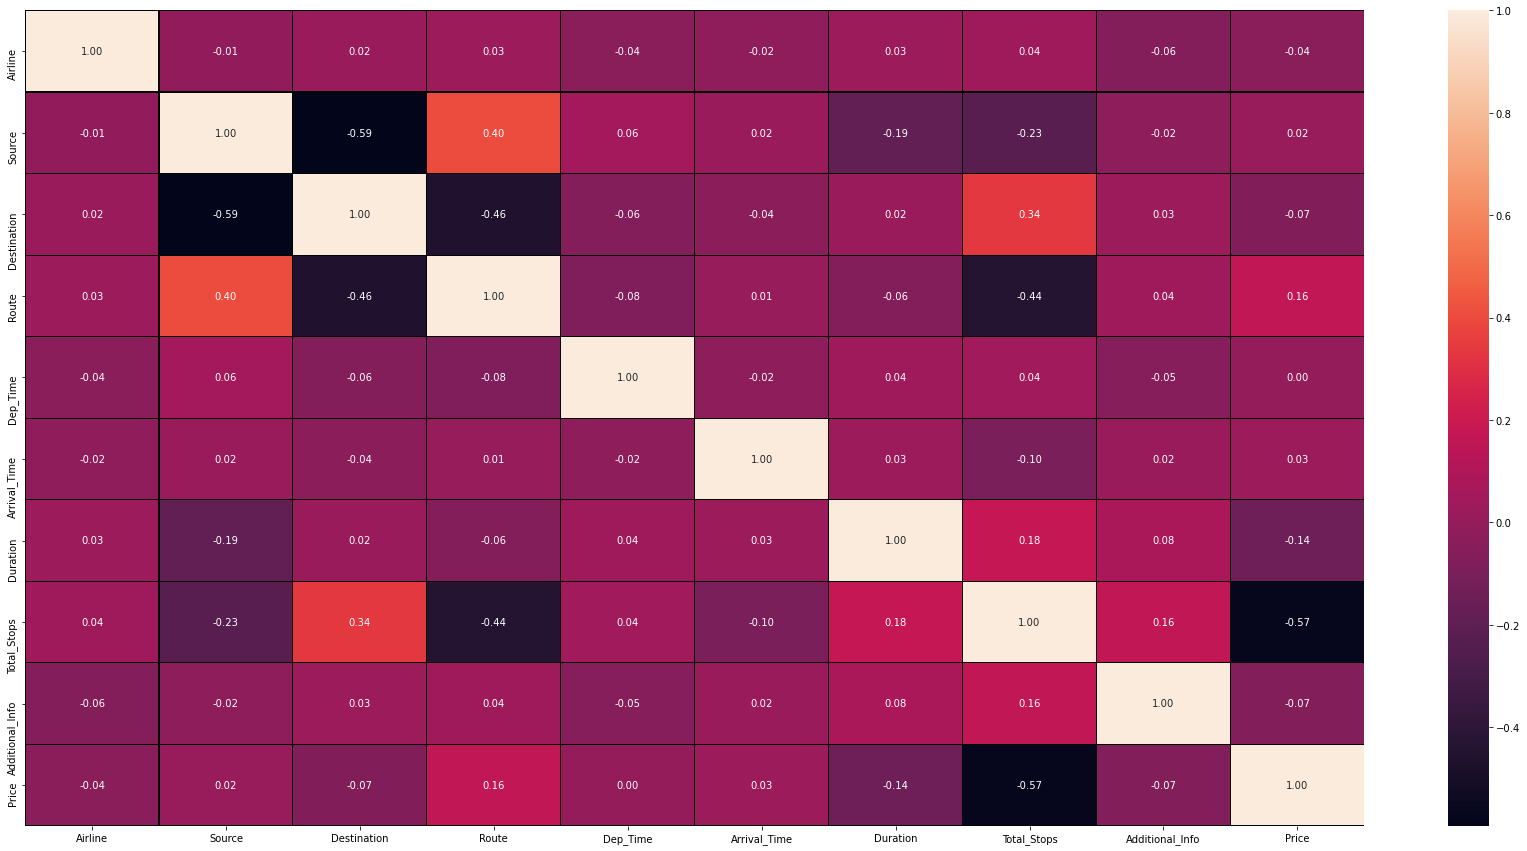

In [34]:
plt.figure(figsize=(30,15))
sns.heatmap(cor,annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

TO KNOW THE DEPENDENCY TO TARGET WE HAVE TO DEPEND ANOTHER PLOT

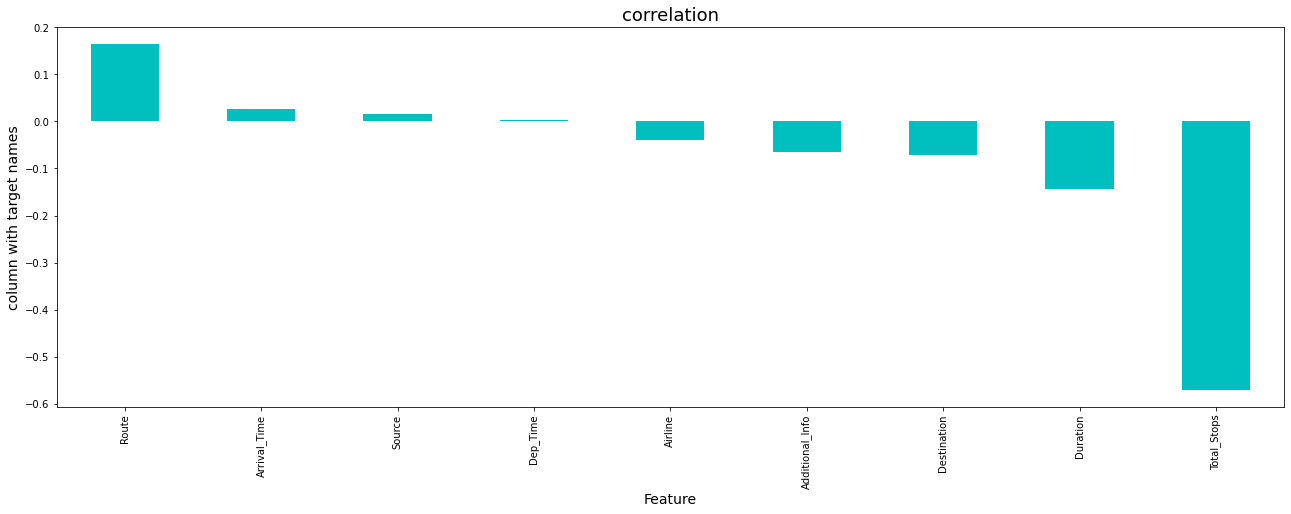

In [35]:
plt.figure(figsize=(22,7))
cor['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

WE HAVE TO DROP SOME UNWANTED COLUMNS WHICH HAVE LESS DEPENDENCY

In [37]:

df.drop(['Total_Stops'],axis=1,inplace=True)

# SKEWNESS REMOVAL

In [38]:
df.skew()

Airline            0.731095
Source            -0.424054
Destination        1.244169
Route             -0.502066
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Additional_Info   -1.779838
Price              1.812552
dtype: float64

SOME CCOLUMNS HAVE SKEWNESS PRESENCE ,HISTOGRAM CLEARLEY CONVEYS THIS

<AxesSubplot:ylabel='Frequency'>

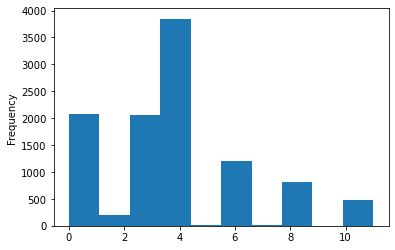

In [39]:
df['Airline'].plot.hist()

Airline SHOWS SKEWNESS PRESENCE

<AxesSubplot:ylabel='Frequency'>

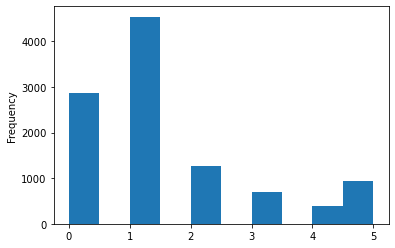

In [40]:
df['Destination'].plot.hist()

Destination has clear skewness presence in the plot

<AxesSubplot:ylabel='Frequency'>

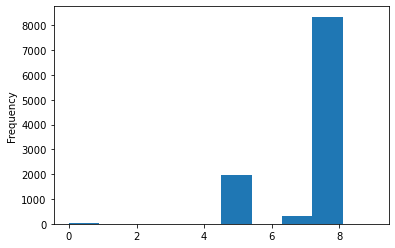

In [41]:
df['Additional_Info'].plot.hist()

Additional_Info has skewness presence

# REMOVING SKEWNESS BY SQRT

In [42]:
from scipy import sqrt

In [43]:
df["Airline"]=np.sqrt(df["Airline"])
df["Destination"]=np.sqrt(df["Destination"])
df["Additional_Info"]=np.sqrt(df["Additional_Info"])

In [44]:
df.skew()

Airline           -0.473393
Source            -0.424054
Destination        0.022293
Route             -0.502066
Dep_Time           0.195055
Arrival_Time      -0.606530
Duration          -0.213427
Additional_Info   -3.143740
Price              1.812552
dtype: float64

splitting X AND Y AND APPLYING POWER TRANSFORM

In [45]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [46]:
x.shape

(10683, 8)

In [47]:
y.shape

(10683,)

In [48]:
from sklearn.preprocessing import PowerTransformer

In [49]:
pt=PowerTransformer(method="yeo-johnson")

In [50]:
X_power=pt.fit_transform(x)

In [51]:
df1=pd.DataFrame(X_power,columns=x.columns)

In [52]:
df1.skew()

Airline            0.004986
Source            -0.238259
Destination       -0.108238
Route             -0.442983
Dep_Time          -0.150760
Arrival_Time      -0.381592
Duration          -0.390688
Additional_Info   -1.376375
dtype: float64

In [53]:
df1.drop(['Additional_Info'],axis=1,inplace=True)

skewness is handled successfully

# MULTICOLLINEARITY

VIF HELP TO FIND THE MULTICOLLINEARITY

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
def vif_calc():
    vif=pd.DataFrame()
    vif['VIF Factor']=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    vif['Features']=x.columns
    print(vif)

In [56]:
vif_calc()

   VIF Factor         Features
0    8.516468          Airline
1    6.854880           Source
2    4.697353      Destination
3    6.237938            Route
4    4.049098         Dep_Time
5    7.555040     Arrival_Time
6    4.426092         Duration
7   30.990676  Additional_Info


NO VIF VALUES ARE IN HIGH RANGE

# SCALING FEATURES

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
sc=StandardScaler()

In [59]:
x=sc.fit_transform(x)

In [60]:
x

array([[-0.22875125, -1.65844074,  1.80243833, ..., -1.92108588,
         0.42287466,  0.47054034],
       [-1.35000195,  0.89005213, -1.3848823 , ...,  0.10911685,
         1.30672664,  0.47054034],
       [ 0.18165498,  0.04055451,  0.04053082, ..., -1.37808961,
        -0.81083539,  0.47054034],
       ...,
       [ 0.18165498, -1.65844074,  0.63095626, ..., -0.13824812,
         0.79114632,  0.47054034],
       [ 1.96186562, -1.65844074,  1.80243833, ...,  0.20564952,
         0.40446108,  0.47054034],
       [-1.35000195,  0.04055451,  0.04053082, ...,  0.76674567,
         1.40800134,  0.47054034]])

# SPLITTING AND APPLYING ALGORITHMS

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=45)

In [63]:
x_train.shape

(7478, 8)

In [64]:
x_test.shape

(3205, 8)

In [65]:
y_train.shape

(7478,)

In [66]:
y_test.shape

(3205,)

# LINEAR REGRESSION

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [69]:
lm=LinearRegression()

In [70]:
lm.fit(x_train,y_train)

LinearRegression()

In [71]:
pred=lm.predict(x_test)

In [72]:
print(pred)

[ 8671.99632584 10296.2368576  10065.52781452 ...  6509.17198859
 12731.96751724  8674.59007781]


# ERROR CALCULATIONS

In [73]:
print("mean absolute error:",mean_absolute_error(y_test,pred))

mean absolute error: 3341.365806785645


In [74]:
print("mean squred error:",mean_squared_error(y_test,pred))

mean squred error: 19922276.787763305


In [75]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,pred)))

root mean squared error: 4463.437776844582


# r2 score

In [76]:
from sklearn.metrics import r2_score

In [77]:
lmscore=r2_score(y_test,pred)

In [78]:
print(lmscore)

0.05613002250009669


# SUPPORT VECTOR REGRESSOR

In [79]:
from sklearn.svm import SVR

In [80]:
svr=SVR(kernel="linear")

In [81]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [82]:
svrpred=svr.predict(x_test)

In [83]:
print(svrpred)

[ 8124.82578449  8823.86755274  8965.50994849 ...  7355.3478762
 11937.54014163  8073.12506996]


# ERRORS

In [84]:
print("mean absolute error:",mean_absolute_error(y_test,svrpred))

mean absolute error: 3270.9766327914044


In [85]:
print("mean squred error:",mean_squared_error(y_test,svrpred))

mean squred error: 20676888.280883823


In [86]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,svrpred)))

root mean squared error: 4547.184654364041


# R2 SCORE

In [87]:
svrscore=r2_score(y_test,svrpred)

In [88]:
print(svrscore)

0.020378329025467545


# DECISION TREE REGRESSOR

In [89]:
from sklearn.tree import DecisionTreeRegressor

In [90]:
dtr=DecisionTreeRegressor()

In [91]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [92]:
dtrpred=dtr.predict(x_test)

In [93]:
print(dtrpred)

[ 7223.33333333 15078.         16142.         ...  8065.
 25735.         15484.75      ]


# ERRORS

In [94]:
print("mean absolute error:",mean_absolute_error(y_test,dtrpred))

mean absolute error: 1254.133831703631


In [95]:
print("mean squred error:",mean_squared_error(y_test,dtrpred))

mean squred error: 7936405.219198354


In [96]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,dtrpred)))

root mean squared error: 2817.1626185221103


# R2 SCORE

In [97]:
dtrscore=r2_score(y_test,dtrpred)

In [98]:
print(dtrscore)

0.6239920418997511


# K-neighbor regressor

In [99]:
from sklearn.neighbors import KNeighborsRegressor

In [100]:
knnr=KNeighborsRegressor()

In [101]:
knnr.fit(x_train,y_train)

KNeighborsRegressor()

In [102]:
knnrpred=knnr.predict(x_test)

In [103]:
print(knnrpred)

[ 7153.   8603.4  7322.2 ... 12332.  28696.  15417.2]


# ERRORS

In [104]:
print("mean absolute error:",mean_absolute_error(y_test,knnrpred))

mean absolute error: 1384.3398439937598


In [105]:
print("mean squred error:",mean_squared_error(y_test,knnrpred))

mean squred error: 6593640.248811233


In [106]:
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,knnrpred)))

root mean squared error: 2567.808452515731


# R2 SCORE

In [107]:
knnrscore=r2_score(y_test,knnrpred)

In [108]:
print(knnrscore)

0.6876090449104417


WE WANT TO FIND THE CROSS VALIDATION SCORE TO FIND THE BEST ALGORITHM

# CROSS VALIDATION MEAN SCORE

In [109]:
from sklearn.model_selection import cross_val_score

In [110]:
print(cross_val_score(lm,x,y,cv=5).mean())

0.06714058368081303


In [111]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.020856750553383874


In [112]:
print(cross_val_score(dtr,x,y,cv=5).mean())

0.706318521403564


In [113]:
print(cross_val_score(knnr,x,y,cv=5).mean())

0.7081935051824186


HERE SELECTING KNN FOR FURTHER PROCEEDINGS

# HYPER PARAMETER TUNING FOR KNN

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
parameter={'n_neighbors':np.arange(2,10),
          'weights':['uniform','distance'],
          'algorithm':['auto','ball_tree','kd_tree','brute'],'leaf_size':[5,10,15]}

In [116]:
GCV=GridSearchCV(KNeighborsRegressor(),parameter,cv=5)

In [118]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [5, 10, 15],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']})

In [120]:
GCV.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 15,
 'n_neighbors': 9,
 'weights': 'distance'}

PASSING THIS BEST PARAMETER VALUES TO MODEL

In [121]:
Flight_model=KNeighborsRegressor(algorithm ='ball_tree', n_neighbors = 9, weights = 'distance',leaf_size = 15)

In [122]:
Flight_model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=15, n_neighbors=9,
                    weights='distance')

In [123]:
Finalpred=Flight_model.predict(x_test)

In [124]:
Finalr2score=r2_score(y_test,Finalpred)

In [125]:
print(Finalr2score)

0.6542571926399556


# saving and conclusion of model

In [126]:
Finalconclusion=pd.DataFrame([Flight_model.predict(x_test)[:],Finalpred[:]],index=["Predicted","Orginal"])

In [127]:
Finalconclusion

0           1            2            3            4     \
Predicted  7223.333333  8917.62365  7618.928597  4577.563915  4261.666667   
Orginal    7223.333333  8917.62365  7618.928597  4577.563915  4261.666667   

                   5       6             7        8            9     ...  \
Predicted  14368.437762  7579.0  13371.166667  15129.0  4279.444444  ...   
Orginal    14368.437762  7579.0  13371.166667  15129.0  4279.444444  ...   

                  3195     3196     3197         3198    3199    3200  \
Predicted  7094.430547  5336.25  11982.0  3948.333333  3729.5  4823.0   
Orginal    7094.430547  5336.25  11982.0  3948.333333  3729.5  4823.0   

                  3201         3202          3203      3204  
Predicted  9781.634433  8982.556065  27629.142026  15484.75  
Orginal    9781.634433  8982.556065  27629.142026  15484.75  

[2 rows x 3205 columns]

# SAVING

In [128]:
import joblib

In [129]:
joblib.dump(Flight_model,"Flight_model1.obj")

['Flight_model1.obj']